# Aproximación polinomial

# Aproximación polinomial

Se utiliza para encontrar valores que no se encuentran tabulados; por ejemplo, se cuenta con los datos de temperatura de ebullición para la acetona a diferentes presiones:


|**Puntos**| 0  | 1    | 2    | 3    |
|---       |--- |---   |---   |---   |
|$T(^oC)$   |56.5| 113.0| 181.0| 214.5|
|$P(atm)$  | 1  | 5    | 20   | 40   |

Se desea saber la temperatura de ebullición de la acetona a $2\,atm$.

Considerando que la ebullución de la acetona se comporta de forma lineal en el intervalo $(1\,atm-5\,atm)$ que deseamos encontrar la temperatura, se puede resolver de la forma siguiente:

**Paso 1:** considerando que la temperatura se comporta de forma lineal, se tiene que:

$$T(P)=a_0 + a_1\,P $$

**Paso 2:** se toman los puntos 0 y 1, porque entre esos puntos se encuentra la temperatura a la presión que se desea.

$$\begin{align*}
56.5 &= a_0 + 1\,a_1,\, \text{punto 0}\\
113.0 &= a_0 + 5\,a_1,\, \text{punto 1}
\end{align*}$$

**Paso 3:** resolviendo el sistema se tiene que $a_0 = 42.4$ y $a_1 = 14.13$, por tanto, la ecuación que describe la temperatura en función de la presión en el intervalo de $1\,atm$ a $5\,atm$ es:

$$T(P)=42.4 + 14.13\,P $$

**Paso 4:** evaluar la ecuación en $2\,atm$ para encontrar la temperatura de ebullición deseada.

In [ ]:
T = lambda P: 42.4 + 14.13*P

In [ ]:
T(2)

70.66

In [ ]:
# Con poly1d se puede construir un polinomio en términos de sus coeficientes
# p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]
import numpy as np
coeficientes = [14.13,42.4]
Tp = np.poly1d(coeficientes)

In [ ]:
Tp(2)

70.66

In [ ]:
# Algunos atributos de poly1d
Tp.coefficients

array([14.13, 42.4 ])

In [ ]:
Tp.order

1

In [ ]:
Tp.variable

'x'

In [ ]:
Tp.roots

array([-3.00070771])

Al graficar los datos tabulados y los datos que genera la ecuación que describe la temperatura en función de la presión en el intervalo de $1\,atm$ a $5\,atm$, se puede observar que la aproximación sólo funciona en el intervalo para el cual se construyó.

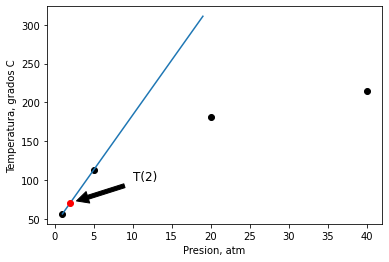

In [ ]:
import matplotlib.pyplot as plt
Temperatura = [56.5, 113.0, 181.0, 214.5]
Presion = [1, 5, 20, 40]
p = np.arange(1, 20)
plt.plot(Presion,Temperatura, "ko")
plt.plot(p,T(p))
plt.plot(2,T(2), "ro")
plt.annotate("T(2)", xy=(2,T(2)), xytext=(10, 100),
             arrowprops=dict(facecolor='black', shrink=0.1),fontsize=12)
plt.xlabel("Presion, atm")
plt.ylabel("Temperatura, grados C")
plt.show()

Si se desea encontrar una aproximación mejor a la anterior $(70.66\,ºC)$, se puden usar más puntos de los datos tabulados, por ejemplo, los puntos $0,1$ y $2$; y aproximar el comportamiento de la temperatura de forma cuadrática:

$$T(P) = a_0 + a_1\,P + a_2\,P^2$$

**Paso 1:** considerando los puntos $0,1$ y $2$, se llega a un sistema de ecuaciones lineales:

$$\begin{align*}
56.5  &= a_0 + a_1\,1 + a_2\,1^2 \, \text{punto 0}\\
113.0 &= a_0 + a_1\,5 + a_2\,5^2 \, \text{punto 1}\\
181.0 &= a_0 + a_1\,20 + a_2\,20^2 \, \text{punto 2}
\end{align*}$$

**Paso 2:** Resolver el sistema de ecuaciones lineales.

In [ ]:
"""
Vamos a utilizar el método solve de la biblioteca numpy para resolver el sistema de ecuaciones lineales
"""

# Resolviendo el sistema utilizando el método solve
A = np.array([[1,1,1],[1,5,25],[1,20,400]])    # Matriz de coeficientes A
b = np.array([56.5,113.0,181.0])    # Vector b
x = np.linalg.solve(A,b)    # se llama a método solve para resolver el sistema
x

array([39.85087719, 17.15394737, -0.50482456])

La ecuación que describe la temperatura en función de la presión en el intervalo de $0\,atm$ a $20\,atm$ es:

$$T(P)=39.85 + 17.15\,P - 0.5048\,P^2 $$

**Paso 3**: evaluar la ecuación en 2 atm

In [ ]:
x[::-1]    # Invertir el orden

array([-0.50482456, 17.15394737, 39.85087719])

In [ ]:
# p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]
T_P = np.poly1d(x[::-1])
T_P(2)

72.13947368421051

In [ ]:
T_P.order

2

Al graficar los datos tabulados y la función cuadrática se pude observar que el ajuste a los datos tabulados es mejor. 

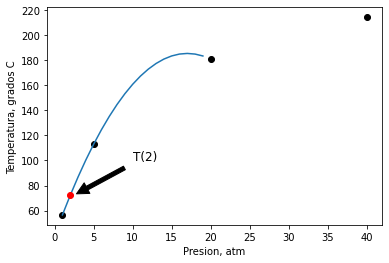

In [ ]:
plt.plot(Presion,Temperatura, "ko")
plt.plot(p,T_P(p))
plt.plot(2,T_P(2), "ro")
plt.annotate("T(2)", xy=(2,T(2)), xytext=(10, 100),
             arrowprops=dict(facecolor='black', shrink=0.1),fontsize=12)
plt.xlabel("Presion, atm")
plt.ylabel("Temperatura, grados C")
plt.show()

**Tarea** Realice una aproximación polinomial cúbica $(T(P) = a_0 + a_1\,P + a_2\,P^2 + a_3\,P^3)$ a los datos tabulados.